

# AAI612: Deep Learning & its Applications


*Notebook 3.5: Detecting Breast Cancer*

<a href="https://colab.research.google.com/github/harmanani/AAI612/blob/main/Week3/Notebook3.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Detection

Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast Cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.

## Dataset

This is an analysis of the Breast Cancer Wisconsin (Diagnostic) [DataSet](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). This data set was created by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin,USA. To create the dataset Dr. Wolberg used fluid samples, taken from patients with solid breast masses and an easy-to-use graphical computer program called Xcyt, which is capable of perform the analysis of cytological features based on a digital scan. The program uses a curve-fitting algorithm, to compute ten features from each one of the cells in the sample, than it calculates the mean value, extreme value and standard error of each feature for the image, returning a 30 real-valuated vector

Attribute Information:

- ID number
- Diagnosis (M = malignant, B = benign) 3-32

Ten real-valued features are computed for each cell nucleus:

1) radius (mean of distances from center to points on the perimeter)
2) texture (standard deviation of gray-scale values)
3) perimeter
4) area
5) smoothness (local variation in radius lengths)
6) compactness (perimeter^2 / area - 1.0)
7) concavity (severity of concave portions of the contour)
8) concave points (number of concave portions of the contour)
9) symmetry
10) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.  There are no missing attribute values.  The class distribution is 357 benign and 212 malignant.

## The Problem

The objective is to classify whether the breast cancer is benign or malignant.  Let us start by importing the dataset:

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/harmanani/AAI612/main/Week3/breast_cancer/data.csv')
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [3]:
# Deelete the last column!
del data['Unnamed: 32']

## The Solution: Deep Learning

Read features and label

In [4]:
#Skip the first two columns: The ID and the diagnosis
X = data.iloc[:, 2:].values

# Now, read the diagnosis
y = data.iloc[:, 1].values

Encoding categorical data

In [5]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Exploring the Dataset

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
data.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [9]:
X_train.shape

(455, 30)

In [10]:
X_valid.shape
y_valid.shape

(114,)

Furthermore, we can see that these 28x28 images are represented as a collection of unsigned 8-bit integer values between 0 and 255, the values corresponding with a pixel's grayscale value where `0` is black, `255` is white, and all other values are in between:

In [11]:
X_train.dtype

dtype('float64')

In [12]:
X_train.min()

np.float64(0.0)

In [13]:
X_train.max()

np.float64(4254.0)

In [14]:
X_train[0]

array([1.005e+01, 1.753e+01, 6.441e+01, 3.108e+02, 1.007e-01, 7.326e-02,
       2.511e-02, 1.775e-02, 1.890e-01, 6.331e-02, 2.619e-01, 2.015e+00,
       1.778e+00, 1.685e+01, 7.803e-03, 1.449e-02, 1.690e-02, 8.043e-03,
       2.100e-02, 2.778e-03, 1.116e+01, 2.684e+01, 7.198e+01, 3.840e+02,
       1.402e-01, 1.402e-01, 1.055e-01, 6.499e-02, 2.894e-01, 7.664e-02])

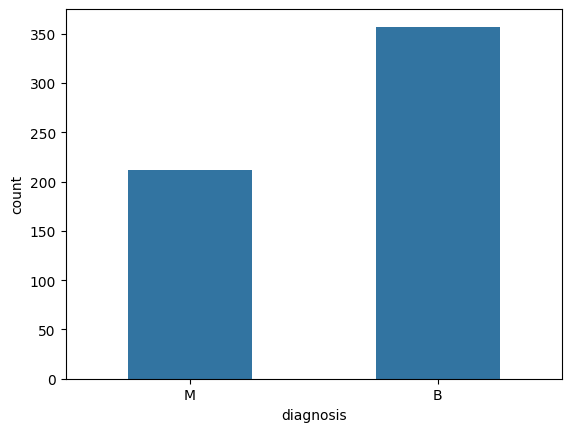

In [15]:
import seaborn as sns
ax = sns.countplot(x=data["diagnosis"], width=0.5)

### Scaling!

Let us scale the features!

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

And now notice the difference!

In [17]:
X_train[0]

array([-1.15036482, -0.39064196, -1.12855021, -0.95876358,  0.3109837 ,
       -0.5959945 , -0.80259612, -0.80249002,  0.29453906,  0.0942515 ,
       -0.4950523 ,  1.48720153, -0.51448782, -0.49154005,  0.28149837,
       -0.60451206, -0.46900701, -0.61170002,  0.05798237, -0.35763702,
       -1.0431756 ,  0.21353282, -1.0360446 , -0.84880771,  0.34249851,
       -0.73009743, -0.81232053, -0.75798367, -0.01614761, -0.38503402])

## Creating the Model

With the data prepared for training, it is now time to create the model that we will train with the data. This first basic model will be made up of several *layers* and will be comprised of 3 main parts:

1. An input layer, which will receive data in some expected format
2. Several [hidden layers](https://developers.google.com/machine-learning/glossary#hidden-layer), each comprised of many *neurons*. Each [neuron](https://developers.google.com/machine-learning/glossary#neuron) will have the ability to affect the network's guess with its *weights*, which are values that will be updated over many iterations as the network gets feedback on its performance and learns
3. An output layer, which will output the prediction

### Instantiating the Model

To begin, we will use Keras's [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model class to instantiate an instance of a model that will have a series of layers that data will pass through in sequence:

In [18]:
from tensorflow.keras.models import Sequential

model = Sequential()

### Creating the Input Layer

Next, we will add the input layer. This layer will be *densely connected*, meaning that each neuron in it, and its weights, will affect every neuron in the next layer. To do this with Keras, we use Keras's [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layer class.

In [19]:
from tensorflow.keras.layers import Dense, Dropout

We will learn more about activation functions later, but for now, we will use the `relu` activation function, which in short, will help our network to learn how to make more sophisticated guesses about data than if it were required to make guesses based on some strictly linear function.

In [20]:
model.add(Dense(units=30, activation='relu', input_shape=(30,)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Adding dropout to prevent overfitting.  More about this one later :-)

In [21]:
model.add(Dropout(rate=0.1))

### Creating the Hidden Layer

Now we will add an additional densely connected layer. Again, much more will be said about these later, but for now know that these layers give the network more parameters to contribute towards its guesses, and therefore, more subtle opportunities for accurate learning:

In [22]:
model.add(Dense(units = 16, activation='relu'))
model.add(Dropout(rate=0.1))

### Creating the Output Layer

Finally, we will add an output layer. This layer uses the activation function `sigmoid` which will result with an output probability between 0 and 1.  The reason is that this is a classification problem and we the prediction is the highest value:

In [23]:
model.add(Dense(units = 1, activation='sigmoid'))

### Summarizing the Model

Keras provides the model instance method [summary](https://www.tensorflow.org/api_docs/python/tf/summary) which will print a readable summary of a model:

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,443 (5.64 KB)

 Trainable params: 1,443 (5.64 KB)

 Non-trainable params: 0 (0.00 B)

Note the number of trainable parameters. Each of these can be adjusted during training and will contribute towards the trained model's guesses.

### Compiling the Model

Again, more details are to follow, but the final step we need to do before we can actually train our model with data is to [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile) it. Here we specify a [loss function](https://developers.google.com/machine-learning/glossary#loss) which will be used for the model to understand how well it is performing during training. We also specify that we would like to track `accuracy` while the model trains:

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model

Now that we have prepared training and validation data, and a model, it's time to train our model with our training data, and verify it with its validation data.

"Training a model with data" is often also called "fitting a model to data." Put this latter way, it highlights that the shape of the model changes over time to more accurately understand the data that it is being given.

When fitting (training) a model with Keras, we use the model's [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method. It expects the following arguments:

* The training data
* The labels for the training data
* The number of times it should train on the entire training dataset (called an *epoch*)
* The validation or test data, and its labels

Run the cell below to train the model. We will discuss its output after the training completes:

In [26]:
history = model.fit(
    X_train, y_train, epochs=150, verbose=1, validation_data=(X_valid, y_valid)
)

Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.5933 - loss: 0.6578 - val_accuracy: 0.8947 - val_loss: 0.4994
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8771 - loss: 0.4699 - val_accuracy: 0.9123 - val_loss: 0.3765
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9308 - loss: 0.3495 - val_accuracy: 0.9211 - val_loss: 0.2923
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9385 - loss: 0.2710 - val_accuracy: 0.9211 - val_loss: 0.2367
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9422 - loss: 0.2200 - val_accuracy: 0.9386 - val_loss: 0.1986
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9429 - loss: 0.1898 - val_accuracy: 0.9386 - val_loss: 0.1712
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9543 - loss: 0.1442 - val_accuracy: 0.9386 - val_loss: 0.1525
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9642 - loss: 0.1423 - val_accuracy: 0.947

In [27]:
# Predicting the Test set results
y_pred = model.predict(X_valid)
y_pred = (y_pred > 0.5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_pred)

In [29]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/114)*100))

Our accuracy is 97.36842105263158%


### Confusion Matrix

A confusion matrix represents the prediction summary in matrix form. It shows how many prediction are correct and incorrect per class. It helps in understanding the classes that are being confused by model as other class.  So, (1, 1) and (0,0) are properly predicted, benign or malignant.

<img src="https://github.com/harmanani/AAI612/blob/main/Week3/images/3-s2.0-B9780323911979000138-f14-09-9780323911979.jpg?raw=1"/>

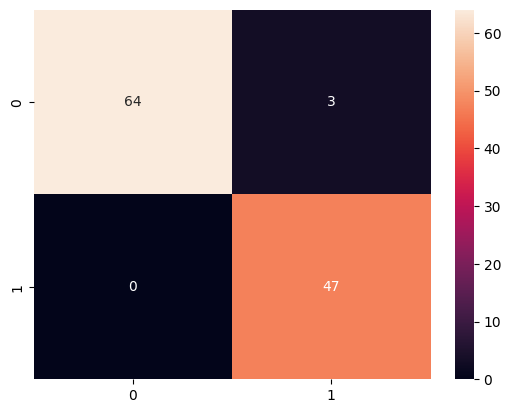

In [30]:
import matplotlib.pyplot as plt

sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [31]:
chart_x = range(1,151)

In [32]:
chart_y_train = history.history['loss']
chart_y_test = history.history['val_loss']
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


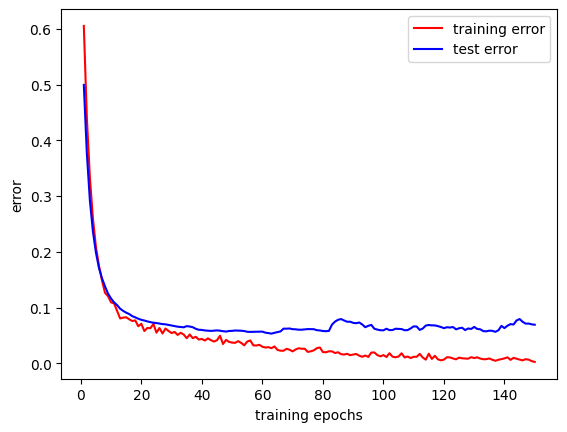

In [33]:
import matplotlib.pyplot as plt

def plot_learning():
    plt.plot(chart_x, chart_y_train, 'r-',label='training error')
    plt.plot(chart_x, chart_y_test, 'b-',
    label='test error')
    plt.xlabel('training epochs')
    plt.ylabel('error')
    plt.legend()
    plt.show()
plot_learning()

### Observing Accuracy

For each of the 5 epochs, notice the `accuracy` and `val_accuracy` scores. `accuracy` states how well the model did for the epoch on all the training data. `val_accuracy` states how well the model did on the validation data, which if you recall, was not used at all for training the model.

The model did quite well! The accuracy quickly reached close to 95%, as did the validation accuracy. We now have a model that can be used to accurately detect and classify hand-written images.

The next step would be to use this model to classify new not-yet-seen handwritten images. This is called [inference](https://blogs.nvidia.com/blog/2016/08/22/difference-deep-learning-training-inference-ai/). We'll explore the process of inference in a later exercise.

In [34]:
from tensorflow.keras.callbacks import EarlyStopping


In [35]:
def get_model(activation_function):
  model = Sequential()
  model.add(Dense(units=30, activation=activation_function, input_shape=(30,)))
  model.add(Dropout(rate=0.1))
  model.add(Dense(units = 16, activation=activation_function))
  model.add(Dropout(rate=0.1))
  model.add(Dense(units = 1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [36]:
import time
def train_model(model, activation, epochs, X_train, y_train, X_valid, y_valid):
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    start_time = time.time()
    history = model.fit(
        X_train,
        y_train,
        epochs=epochs,
        verbose=1,
        validation_data=(X_valid, y_valid),
        callbacks=[early_stopping]
    )
    end_time = time.time()

    training_time = end_time - start_time

    return model, history, training_time

In [37]:
from sklearn.metrics import confusion_matrix, f1_score

In [38]:
def evaluate( model ,epochs, history , X_train,y_valid):
  y_pred = model.predict(X_valid)
  y_pred = (y_pred > 0.5)
  cm = confusion_matrix(y_valid, y_pred)
  print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/114)*100))
  sns.heatmap(cm,annot=True)
  plt.show()
  actual_epochs = len(history.history['loss'])
  chart_x = range(1, actual_epochs + 1)
  chart_y_train = history.history['loss']
  chart_y_test = history.history['val_loss']
  plt.plot(chart_x, chart_y_train, 'r-',label='training error')
  plt.plot(chart_x, chart_y_test, 'b-',
  label='test error')
  plt.xlabel('training epochs')
  plt.ylabel('error')
  plt.legend()
  plt.show()
  f1 = f1_score(y_valid, y_pred)
  print("F1 Score:", f1)

  return f1


In [39]:
res={}

relu 100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9052 - loss: 0.4796 - val_accuracy: 0.9211 - val_loss: 0.3736
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9508 - loss: 0.3312 - val_accuracy: 0.9211 - val_loss: 0.2752
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9196 - loss: 0.2656 - val_accuracy: 0.9211 - val_loss: 0.2169
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9509 - loss: 0.1817 - val_accuracy: 0.9298 - val_loss: 0.1851
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9602 - loss: 0.1371 - val_accuracy: 0.9298 - val_loss: 0.1671
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9556 - loss: 0.1360 - val_accuracy: 0.9386 - val_loss: 0.1508
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9610 - loss: 0.1170 - val_accuracy: 0.9474 - val_loss: 0.1395
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9691 - loss: 0.1038 - val_accuracy: 0.

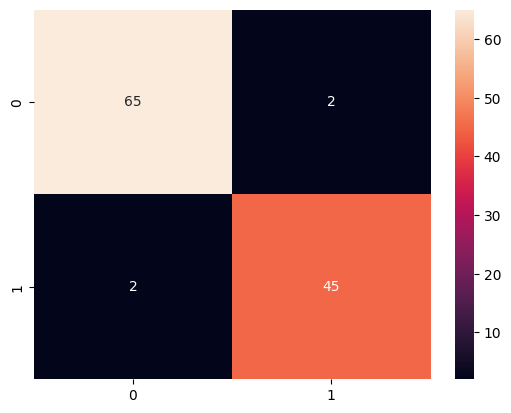

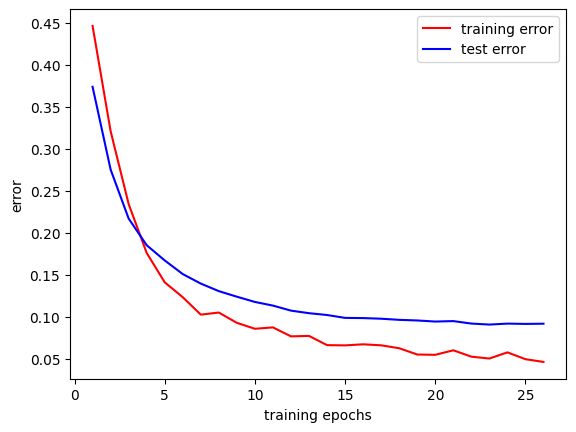

F1 Score: 0.9574468085106383
relu 150
Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6724 - loss: 0.6157 - val_accuracy: 0.8246 - val_loss: 0.5053
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8329 - loss: 0.4339 - val_accuracy: 0.8860 - val_loss: 0.3743
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9154 - loss: 0.3062 - val_accuracy: 0.9035 - val_loss: 0.2922
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9400 - loss: 0.2267 - val_accuracy: 0.9123 - val_loss: 0.2445
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9564 - loss: 0.1720 - val_accuracy: 0.9211 - val_loss: 0.2178
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9474 - loss: 0.1651 - val_accuracy: 0.9211 - val_loss: 0.2005
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9497 - loss: 0.1306 - val_accuracy: 0.9298 - val_loss: 0.1883
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9704 - loss: 0.1223 - val_accuracy: 0.9298 - val_loss: 0

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Our accuracy is 92.98245614035088%


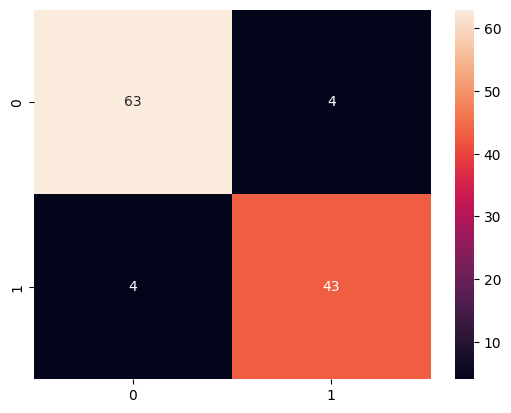

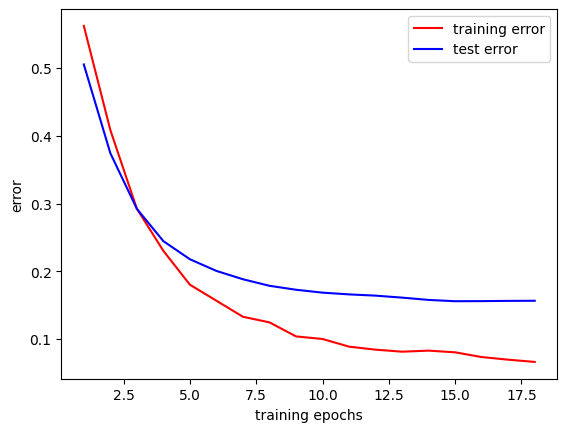

F1 Score: 0.9148936170212766
relu 200
Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6520 - loss: 0.6773 - val_accuracy: 0.6404 - val_loss: 0.5649
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7468 - loss: 0.5129 - val_accuracy: 0.8596 - val_loss: 0.4244
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8623 - loss: 0.4107 - val_accuracy: 0.9035 - val_loss: 0.3357
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9280 - loss: 0.3088 - val_accuracy: 0.9211 - val_loss: 0.2778
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9376 - loss: 0.2292 - val_accuracy: 0.9211 - val_loss: 0.2371
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9484 - loss: 0.2117 - val_accuracy: 0.9123 - val_loss: 0.2044
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9420 - loss: 0.1939 - val_accuracy: 0.9123 - val_loss: 0.1827
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9614 - loss: 0.1567 - val_accuracy: 0.9211 - val_l

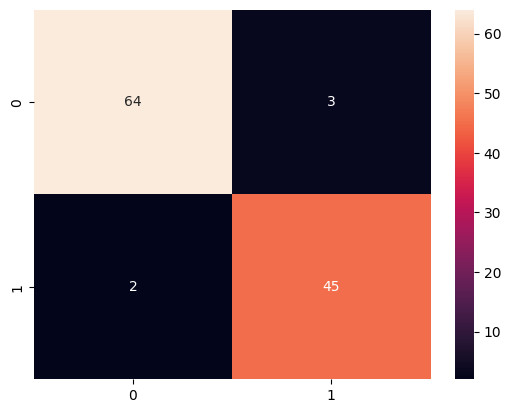

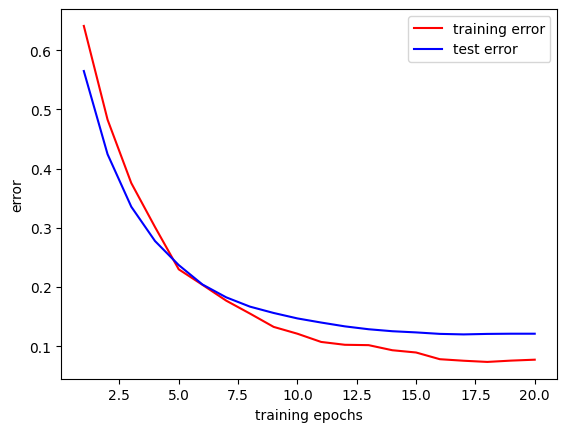

F1 Score: 0.9473684210526315
sigmoid 100
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6119 - loss: 0.6684 - val_accuracy: 0.5877 - val_loss: 0.6333
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6544 - loss: 0.6021 - val_accuracy: 0.6053 - val_loss: 0.5874
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7265 - loss: 0.5672 - val_accuracy: 0.7632 - val_loss: 0.5438
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7443 - loss: 0.5394 - val_accuracy: 0.8333 - val_loss: 0.5030
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8300 - loss: 0.4990 - val_accuracy: 0.8772 - val_loss: 0.4623
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8750 - loss: 0.4460 - val_accuracy: 0.9123 - val_loss: 0.4223
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8844 - loss: 0.4006 - val_accuracy: 0.9386 - val_loss: 0.3853
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9135 - loss: 0.3731 - val_accuracy: 0.9386 - val_loss: 0

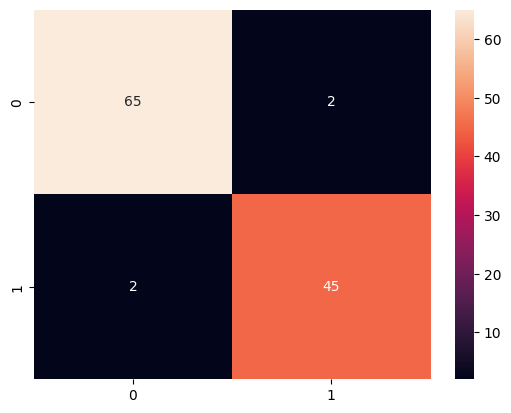

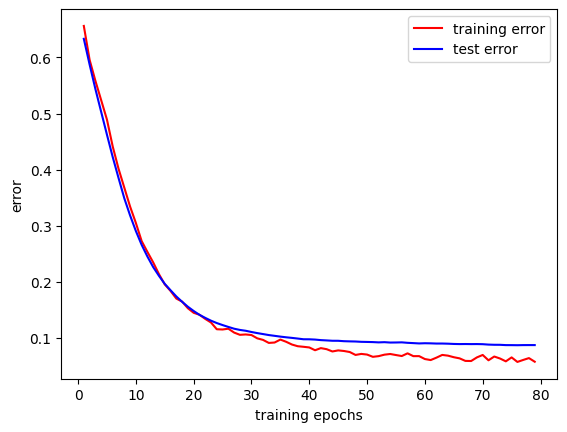

F1 Score: 0.9574468085106383
sigmoid 150
Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6329 - loss: 0.6705 - val_accuracy: 0.6754 - val_loss: 0.6198
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7266 - loss: 0.6053 - val_accuracy: 0.6842 - val_loss: 0.5793
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7559 - loss: 0.5641 - val_accuracy: 0.7719 - val_loss: 0.5376
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8112 - loss: 0.5136 - val_accuracy: 0.8509 - val_loss: 0.4947
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8731 - loss: 0.4759 - val_accuracy: 0.9211 - val_loss: 0.4504
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9061 - loss: 0.4209 - val_accuracy: 0.9298 - val_loss: 0.4115
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9033 - loss: 0.3902 - val_accuracy: 0.9386 - val_loss: 0.3704
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9426 - loss: 0.3331 - val_accuracy: 0.9386 - val_los

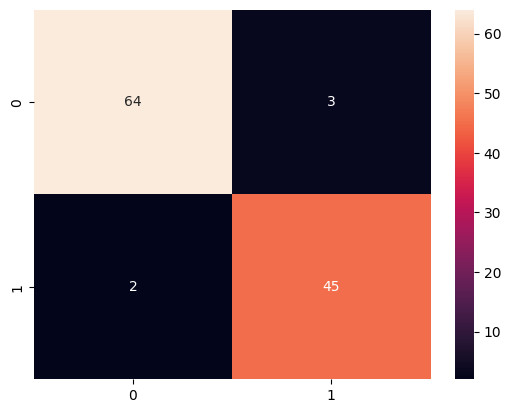

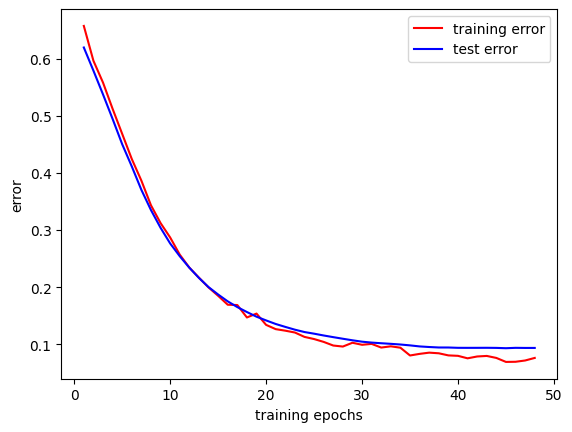

F1 Score: 0.9473684210526315
sigmoid 200
Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.3725 - loss: 0.8048 - val_accuracy: 0.4123 - val_loss: 0.7122
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5151 - loss: 0.7047 - val_accuracy: 0.7456 - val_loss: 0.6527
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6913 - loss: 0.6398 - val_accuracy: 0.6579 - val_loss: 0.6060
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7189 - loss: 0.5878 - val_accuracy: 0.7281 - val_loss: 0.5625
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7771 - loss: 0.5554 - val_accuracy: 0.7807 - val_loss: 0.5185
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8149 - loss: 0.5009 - val_accuracy: 0.8333 - val_loss: 0.4734
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8578 - loss: 0.4471 - val_accuracy: 0.9211 - val_loss: 0.4280
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9033 - loss: 0.4096 - val_accuracy: 0.9386 - val_lo

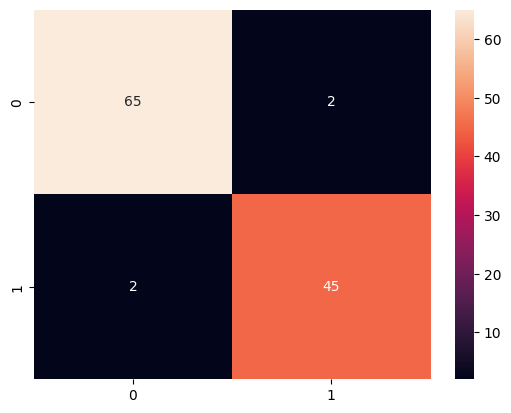

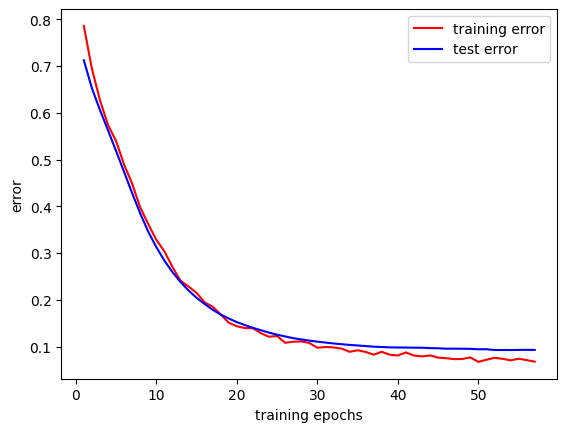

F1 Score: 0.9574468085106383
tanh 100
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4450 - loss: 0.7978 - val_accuracy: 0.8596 - val_loss: 0.4422
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9159 - loss: 0.3938 - val_accuracy: 0.9123 - val_loss: 0.2699
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9258 - loss: 0.2519 - val_accuracy: 0.9386 - val_loss: 0.2020
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9494 - loss: 0.1863 - val_accuracy: 0.9474 - val_loss: 0.1631
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9349 - loss: 0.1739 - val_accuracy: 0.9561 - val_loss: 0.1393
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9795 - loss: 0.1299 - val_accuracy: 0.9474 - val_loss: 0.1204
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9639 - loss: 0.1085 - val_accuracy: 0.9737 - val_loss: 0.1065
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9817 - loss: 0.0880 - val_accuracy: 0.9825 - val_loss: 0

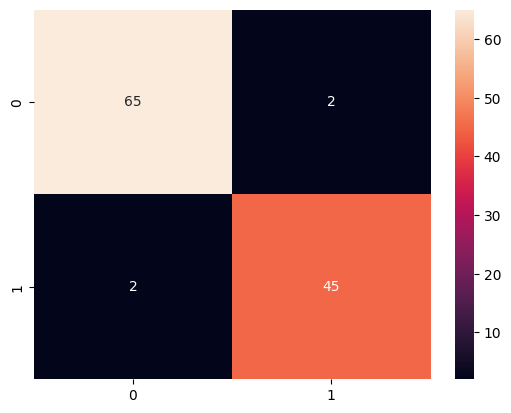

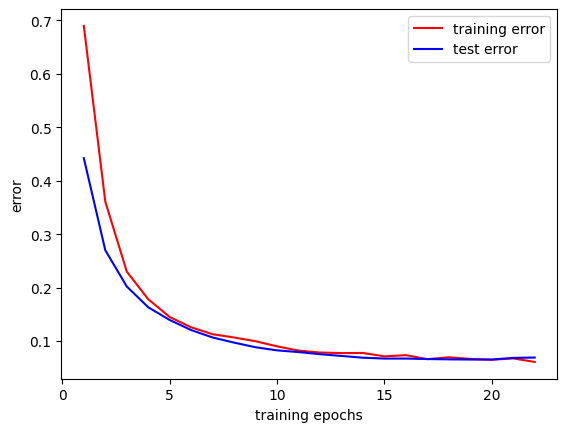

F1 Score: 0.9574468085106383
tanh 150
Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5869 - loss: 0.6686 - val_accuracy: 0.9123 - val_loss: 0.3635
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9171 - loss: 0.3209 - val_accuracy: 0.9211 - val_loss: 0.2217
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9557 - loss: 0.2168 - val_accuracy: 0.9211 - val_loss: 0.1698
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9537 - loss: 0.1659 - val_accuracy: 0.9474 - val_loss: 0.1392
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9717 - loss: 0.1268 - val_accuracy: 0.9649 - val_loss: 0.1196
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9790 - loss: 0.1113 - val_accuracy: 0.9649 - val_loss: 0.1048
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9886 - loss: 0.0953 - val_accuracy: 0.9737 - val_loss: 0.0945
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9818 - loss: 0.1071 - val_accuracy: 0.9825 - val_loss: 0.

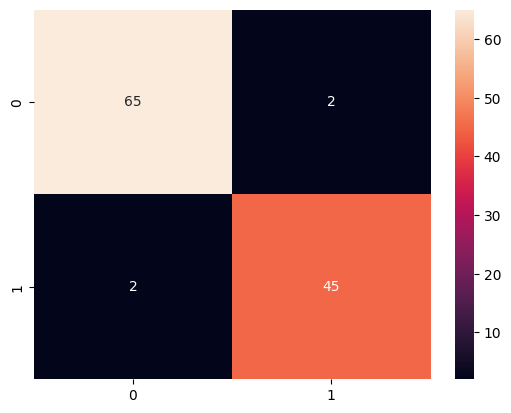

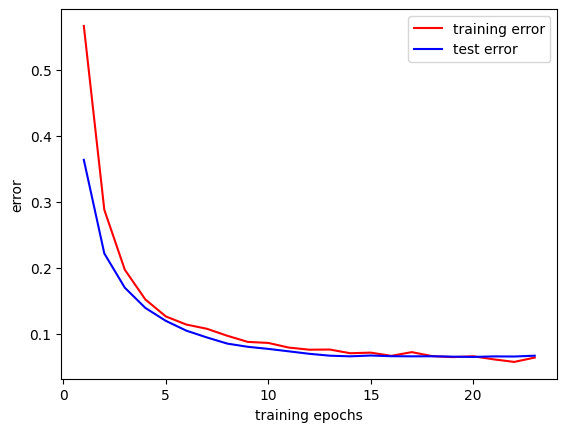

F1 Score: 0.9574468085106383
tanh 200
Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8501 - loss: 0.4264 - val_accuracy: 0.9035 - val_loss: 0.2657
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9086 - loss: 0.2471 - val_accuracy: 0.9211 - val_loss: 0.1931
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9469 - loss: 0.1693 - val_accuracy: 0.9298 - val_loss: 0.1502
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9649 - loss: 0.1290 - val_accuracy: 0.9386 - val_loss: 0.1205
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9661 - loss: 0.1256 - val_accuracy: 0.9825 - val_loss: 0.1027
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9772 - loss: 0.0983 - val_accuracy: 0.9825 - val_loss: 0.0888
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9707 - loss: 0.1119 - val_accuracy: 0.9825 - val_loss: 0.0801
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9789 - loss: 0.0813 - val_accuracy: 0.9825 - val_loss: 0.

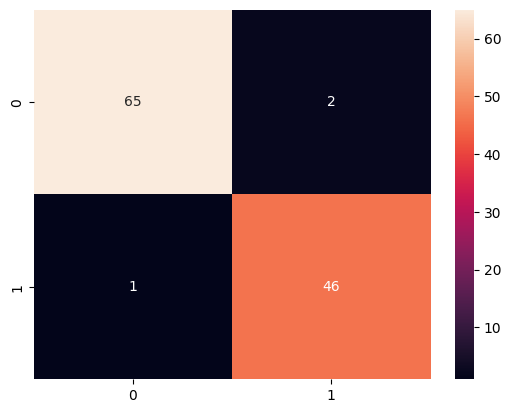

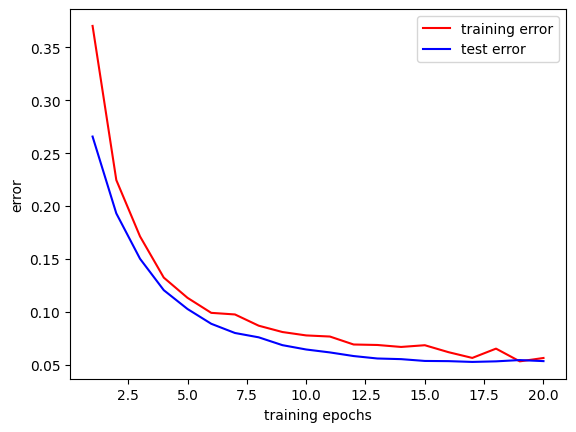

F1 Score: 0.968421052631579
elu 100
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7636 - loss: 0.5195 - val_accuracy: 0.9123 - val_loss: 0.3046
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9141 - loss: 0.2717 - val_accuracy: 0.9211 - val_loss: 0.2121
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9644 - loss: 0.1702 - val_accuracy: 0.9298 - val_loss: 0.1762
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9725 - loss: 0.1382 - val_accuracy: 0.9474 - val_loss: 0.1514
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9653 - loss: 0.1261 - val_accuracy: 0.9474 - val_loss: 0.1366
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9701 - loss: 0.0985 - val_accuracy: 0.9474 - val_loss: 0.1247
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9740 - loss: 0.0918 - val_accuracy: 0.9474 - val_loss: 0.1172
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9644 - loss: 0.1067 - val_accuracy: 0.9474 - val_loss:

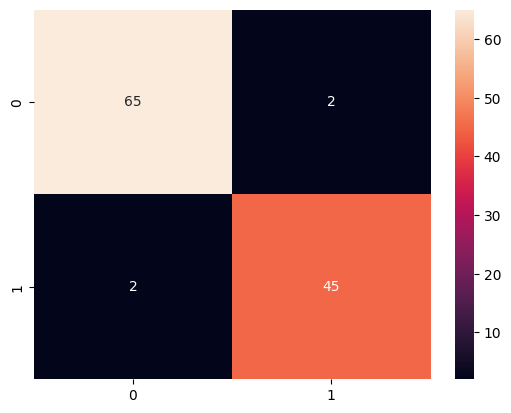

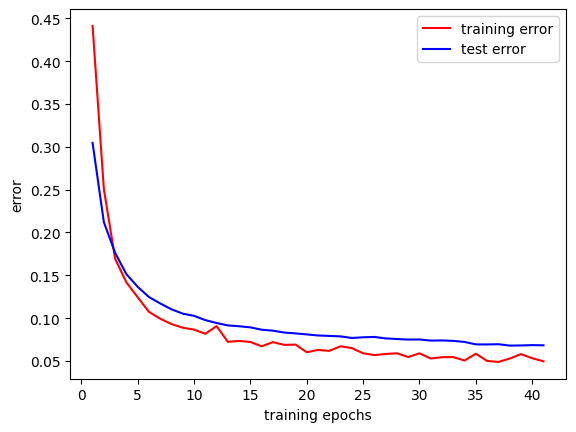

F1 Score: 0.9574468085106383
elu 150
Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2674 - loss: 1.2567 - val_accuracy: 0.8246 - val_loss: 0.4847
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8033 - loss: 0.4415 - val_accuracy: 0.9123 - val_loss: 0.2383
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9183 - loss: 0.2739 - val_accuracy: 0.9298 - val_loss: 0.1779
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9541 - loss: 0.1888 - val_accuracy: 0.9386 - val_loss: 0.1492
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9597 - loss: 0.1695 - val_accuracy: 0.9561 - val_loss: 0.1313
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9567 - loss: 0.1550 - val_accuracy: 0.9649 - val_loss: 0.1188
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9674 - loss: 0.1169 - val_accuracy: 0.9561 - val_loss: 0.1095
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9739 - loss: 0.1045 - val_accuracy: 0.9649 - val_loss: 0

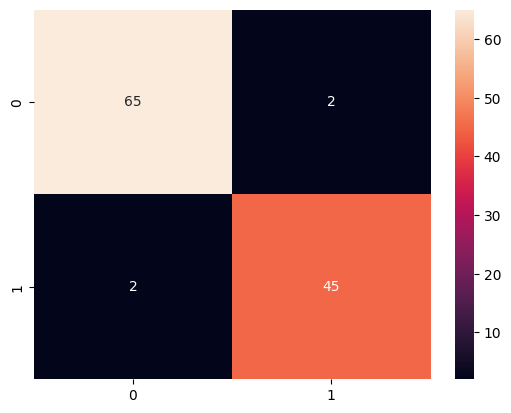

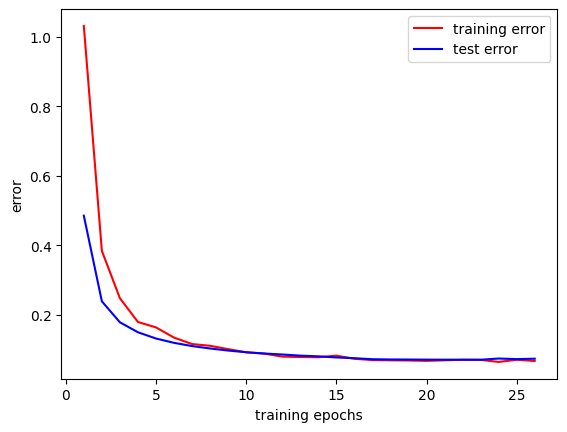

F1 Score: 0.9574468085106383
elu 200
Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6629 - loss: 0.5975 - val_accuracy: 0.9035 - val_loss: 0.3344
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8821 - loss: 0.3401 - val_accuracy: 0.9211 - val_loss: 0.2205
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9581 - loss: 0.2051 - val_accuracy: 0.9211 - val_loss: 0.1735
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9629 - loss: 0.1642 - val_accuracy: 0.9211 - val_loss: 0.1485
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9769 - loss: 0.1205 - val_accuracy: 0.9298 - val_loss: 0.1334
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9802 - loss: 0.1162 - val_accuracy: 0.9298 - val_loss: 0.1233
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9738 - loss: 0.1060 - val_accuracy: 0.9386 - val_loss: 0.1149
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9826 - loss: 0.0886 - val_accuracy: 0.9386 - val_loss: 

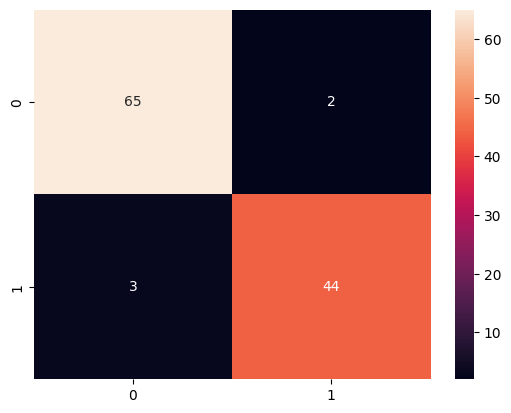

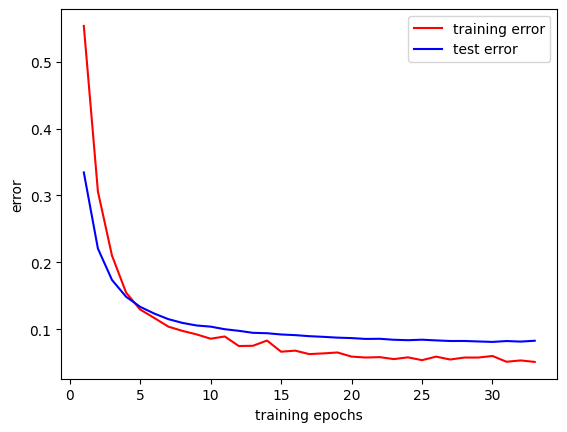

F1 Score: 0.946236559139785
selu 100
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4928 - loss: 1.1045 - val_accuracy: 0.7544 - val_loss: 0.4900
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7988 - loss: 0.4557 - val_accuracy: 0.9035 - val_loss: 0.2459
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8910 - loss: 0.2578 - val_accuracy: 0.9298 - val_loss: 0.1792
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9232 - loss: 0.1753 - val_accuracy: 0.9386 - val_loss: 0.1474
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9566 - loss: 0.1355 - val_accuracy: 0.9298 - val_loss: 0.1328
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9465 - loss: 0.1471 - val_accuracy: 0.9474 - val_loss: 0.1253
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9642 - loss: 0.1150 - val_accuracy: 0.9474 - val_loss: 0.1193
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9633 - loss: 0.1188 - val_accuracy: 0.9474 - val_loss: 0

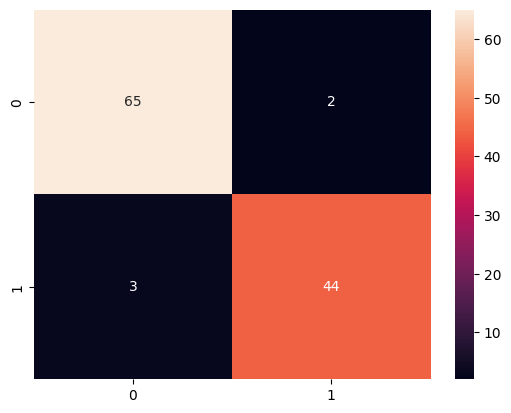

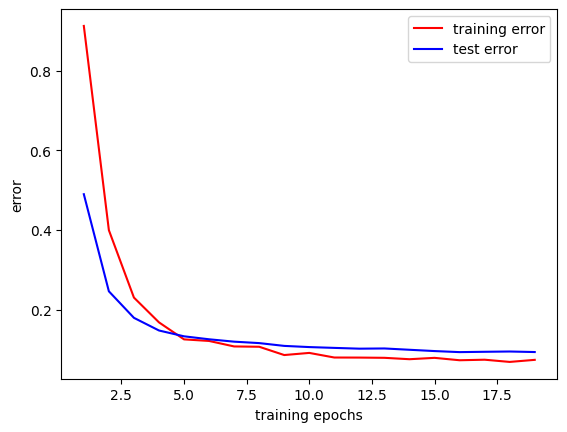

F1 Score: 0.946236559139785
selu 150
Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6841 - loss: 0.7636 - val_accuracy: 0.8860 - val_loss: 0.2896
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9036 - loss: 0.3255 - val_accuracy: 0.9035 - val_loss: 0.1835
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9547 - loss: 0.1736 - val_accuracy: 0.9386 - val_loss: 0.1356
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9687 - loss: 0.1228 - val_accuracy: 0.9561 - val_loss: 0.1111
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9717 - loss: 0.1117 - val_accuracy: 0.9561 - val_loss: 0.0968
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9671 - loss: 0.1224 - val_accuracy: 0.9737 - val_loss: 0.0895
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9649 - loss: 0.0921 - val_accuracy: 0.9649 - val_loss: 0.0824
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9741 - loss: 0.0936 - val_accuracy: 0.9649 - val_l

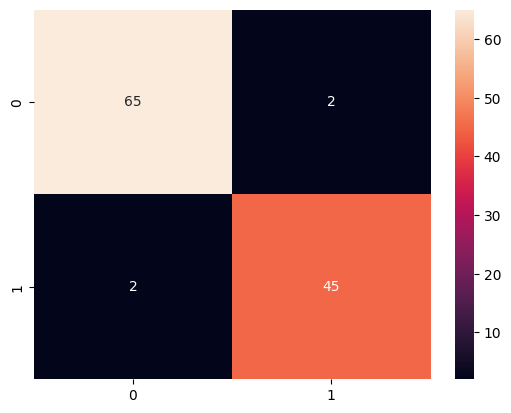

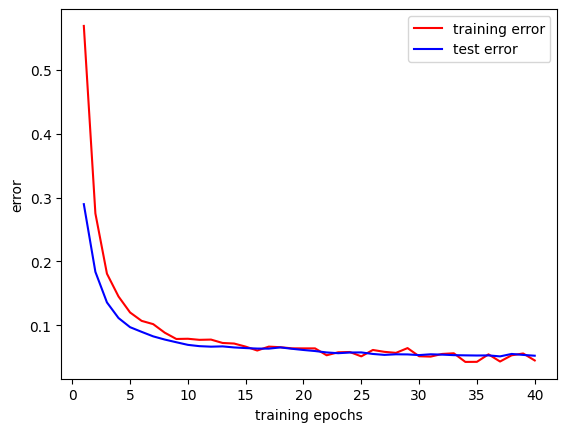

F1 Score: 0.9574468085106383
selu 200
Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4354 - loss: 0.8992 - val_accuracy: 0.8772 - val_loss: 0.3442
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8751 - loss: 0.3129 - val_accuracy: 0.9123 - val_loss: 0.2039
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9369 - loss: 0.1795 - val_accuracy: 0.9298 - val_loss: 0.1561
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9555 - loss: 0.1379 - val_accuracy: 0.9474 - val_loss: 0.1286
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9642 - loss: 0.1218 - val_accuracy: 0.9561 - val_loss: 0.1116
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9625 - loss: 0.1274 - val_accuracy: 0.9649 - val_loss: 0.1017
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9652 - loss: 0.1311 - val_accuracy: 0.9649 - val_loss: 0.0937
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9727 - loss: 0.0949 - val_accuracy: 0.9649 - val_los

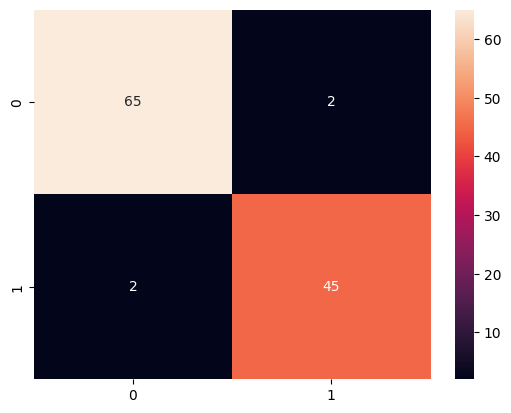

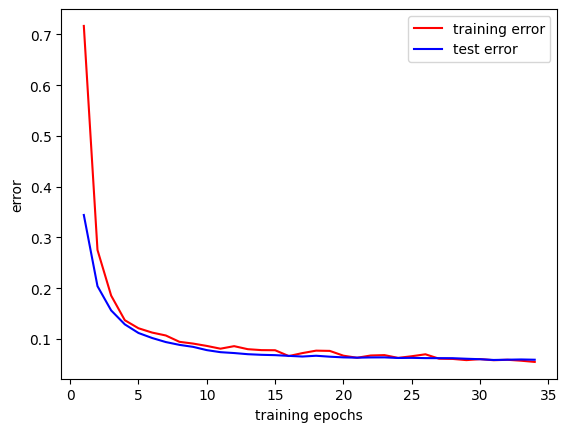

F1 Score: 0.9574468085106383


In [40]:
activations = ['relu', 'sigmoid', 'tanh', 'elu', 'selu']
epochs =[100 , 150 , 200]
for activation in activations:
  for epoch in epochs:
    print(activation, epoch)
    model = get_model(activation)
    model , history, training_time = train_model(model,activation,epoch, X_train, y_train, X_valid, y_valid)
    f1_score_=evaluate( model ,epoch, history , X_train,y_valid)
    res[activation+'_'+str(epoch)] = {"training_time": training_time, "f1":f1_score_}

In [41]:
res

{'relu_100': {'training_time': 16.20344591140747, 'f1': 0.9574468085106383},
 'relu_150': {'training_time': 5.317760944366455, 'f1': 0.9148936170212766},
 'relu_200': {'training_time': 5.8205647468566895, 'f1': 0.9473684210526315},
 'sigmoid_100': {'training_time': 16.11630606651306, 'f1': 0.9574468085106383},
 'sigmoid_150': {'training_time': 13.328653812408447,
  'f1': 0.9473684210526315},
 'sigmoid_200': {'training_time': 12.994836568832397,
  'f1': 0.9574468085106383},
 'tanh_100': {'training_time': 6.816004514694214, 'f1': 0.9574468085106383},
 'tanh_150': {'training_time': 5.996216058731079, 'f1': 0.9574468085106383},
 'tanh_200': {'training_time': 6.431204080581665, 'f1': 0.968421052631579},
 'elu_100': {'training_time': 10.526248693466187, 'f1': 0.9574468085106383},
 'elu_150': {'training_time': 8.777209281921387, 'f1': 0.9574468085106383},
 'elu_200': {'training_time': 11.21734094619751, 'f1': 0.946236559139785},
 'selu_100': {'training_time': 5.6911537647247314, 'f1': 0.94623

In [53]:
df = pd.DataFrame(res).T.reset_index()
df.rename(columns={'index': 'model'}, inplace=True)

print(df)
df.to_csv('results.csv', index=False)

          model  training_time        f1
0      relu_100      16.203446  0.957447
1      relu_150       5.317761  0.914894
2      relu_200       5.820565  0.947368
3   sigmoid_100      16.116306  0.957447
4   sigmoid_150      13.328654  0.947368
5   sigmoid_200      12.994837  0.957447
6      tanh_100       6.816005  0.957447
7      tanh_150       5.996216  0.957447
8      tanh_200       6.431204  0.968421
9       elu_100      10.526249  0.957447
10      elu_150       8.777209  0.957447
11      elu_200      11.217341  0.946237
12     selu_100       5.691154  0.946237
13     selu_150      11.653272  0.957447
14     selu_200      10.624685  0.957447


In [49]:
best_f1_score = df['f1'].max()
best_model_row = df[df['f1'] == best_f1_score]
best_model_name = best_model_row['model'].values[0]
print(best_model_name , best_f1_score)

tanh_200 0.968421052631579


In [52]:
fastest_model = df[df['training_time'] == df['training_time'].min()]
fastest_model_name = fastest_model['model'].values[0]
fastest_model_time = fastest_model['training_time'].values[0]
print(fastest_model_name,fastest_model_time )

relu_150 5.317760944366455
